# Import Library

In [1]:
import nltk
import matplotlib.pyplot as plt
import re
import string
import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from keras.utils import np_utils

# Import Dataset

https://www.kaggle.com/prakharrathi25/google-play-store-reviews

In [2]:
df = pd.read_csv('reviews.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,NaN,NaN,newest,com.appxy.planner
12491,gp:AOqpTOE1KKOOVVKUfhAfXQs2NfJpoywfucrJCMK3Hmu...,Roaring Grizzly Bear,https://play-lh.googleusercontent.com/a-/AOh14...,😁****😁,5,0,NaN,2018-12-12 21:52:56,NaN,NaN,newest,com.appxy.planner
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,NaN,NaN,newest,com.appxy.planner
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,NaN,NaN,newest,com.appxy.planner


In [3]:
df = df.iloc[:, 3:5]
df.head(5)

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version (approx In...,1
3,"Used to keep me organized, but all the 2020 UP...",1
4,Dan Birthday Oct 28,1


Score 1-2 = negative

Score 3 = neutral

Score 4-5 = positive

In [4]:
df.shape

(12495, 2)

In [5]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(12495, 2)

In [6]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x < 3 else 3 if x > 3 else 2)

In [7]:
df.head()

,content,score,sentiment
0,I cannot open the app anymore,1,1
1,I have been begging for a refund from this app...,1,1
2,Very costly for the premium version (approx In...,1,1
3,"Used to keep me organized, but all the 2020 UP...",1,1
4,Dan Birthday Oct 28,1,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

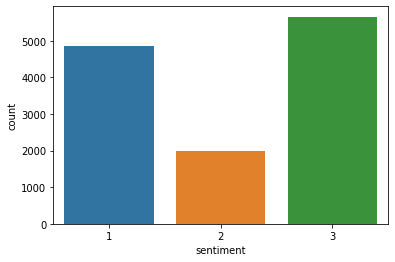

In [8]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [9]:
X = df.iloc[:, 0].values  
y = df.iloc[:, 2].values

In [10]:
X[12]

"Horrible app. It doesn't do as described. Absolutely no support!"

# Preprocessing Data

Stemming dan Lemmatization keduanya menghasilkan semacam kata dasar dari kata-kata infleksi dan oleh karena itu satu-satunya perbedaan adalah bahwa hasil stemming mungkin bukan kata yang sebenarnya sedangkan, lemma adalah kata bahasa yang sebenarnya. Stemmimng lebih cepat, tapi kami memutuskan memakai lemma agar makna kata tidak terganti. 

In [11]:
listStopword = set(stopwords.words('english'))
lemma = nltk.wordnet.WordNetLemmatizer()

def stopWordAndStem(inputStr):
    tokens = word_tokenize(inputStr)
    removed = []
    for i in tokens:
        if i not in listStopword:
            removed.append(lemma.lemmatize(i))
    return " ".join(removed)

In [12]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
after_preprocessed = []

for sentence in X: 
    # Remove all link
    s = sentence.replace('\n','')

    s = re.sub(r"http\S+", "", s)

    result = s.replace("&amp;", "");
      
    # Remove all mention
    result = re.sub("@[A-Za-z0-9_]+","", result)
    
    # Remove all hashtag
    result = re.sub("#[A-Za-z0-9_]+","", result)
    
    # Remove all emoji
    result = emoji_pattern.sub(r'', result)
    
    # Remove all the special characters
    result = re.sub(r'\W', ' ', result)
 
    # remove all single characters
    result = re.sub(r'\s+[a-zA-Z]\s+', ' ', result)
 
    # Substituting multiple spaces with single space
    result= re.sub(r'\s+', ' ', result, flags=re.I)
    
    result = re.sub(r"\d+", "", result)
    
    result = result.strip()
    
    # Converting to Lowercase
    result = result.lower()
    
    result = stopWordAndStem(result)
    
    after_preprocessed.append(result)

### Result After Preprocessing

In [13]:
after_preprocessed

['open app anymore',
 'begging refund app month nobody replying',
 'costly premium version approx indian rupee per year better download premium version app apkmos website use microsoft list app far better',
 'used keep organized update made mess thing cudn u leave well enuf alone guess ur techie feel need keep making change justify continuing collect salary',
 'dan birthday oct',
 'changed viewed different list jumbled together find need',
 'looking grocery list app every time tap away app tap opening see list find way keep certain list showing open reopen app eta response reply work like phone even grocery list showing open another app go back app list list showing retap get grocery list show',
 'reset free trial new phone like see better',
 'stop monthly payment use app anymore',
 'complain crash immediately fixed good job crash returned really need fixed need change apps otherwise followed instruction deleting data etc crashed patient person used year let try one time find another a

# Training 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(after_preprocessed, y, test_size=0.25, random_state=42, stratify=y)

## Feature Extraction using TF-IDF

In [15]:
tfidfconverter = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))  

In [16]:
X_train = tfidfconverter.fit_transform(X_train)
X_test = tfidfconverter.transform(X_test)

### Save TF-IDF transform result vectorizer

In [17]:
import joblib

joblib.dump(tfidfconverter, "./tfidf-train.joblib")

['./tfidf-train.joblib']

## Random Forest

Random Forest merupakan salah satu metode dalam Decision Tree. Random Forest merupakan kombinasi masing-masing tree yang kemudian dikombinasikan ke dalam satu model. Random Forest bergantung pada sebuah nilai vektor random dengan distribusi yang sama. Random Forest terdiri dari classifier yang berbentuk pohon {h(x, θ k ), k = 1, . . .} dimana θk adalah random vector yang diditribusikan secara independen dan masing masing tree pada sebuah unit kan memilih class yang paling popular pada input x.

Random Forest digunakan untuk pemilihan fitur secara random, masing-masing training set diambil dengan pengganti dari training set asli kemudian tree ditanam pada sebuah training set menggunakan seleksi fitur random. Random Forest merupakan fitur yang paling sederhana dengan membentuk fitur seleksi secara random.

Sumber : 
Ho, Tin Kam (1995). Random Decision Forests (PDF). Proceedings of the 3rd International Conference on Document Analysis and Recognition, Montreal, QC, 14–16 August 1995. pp. 278–282. Breiman L (2001). “Random Forests”. Machine Learning. 45 (1): 5–32. doi:1023/A:1010933404324.

In [18]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

n_estimators - default = 100 number of trees

random_state - default = none disini menggunakan 42. Random state sendiri disediakan untuk mengontrol random number generator yang digunakan. Random_state tidak berarti bahwa randomization selalu digunakan, bergantung dengan parameter lainnya.

    none(default) - menggunakan keadaan random dari numpy.random. Memanggil fungsi beberapa kali dengan instance yg sama tetapi hasil yang berbeda.
    an integer - nilai yang paling populer adalah 0 dan 42. Dengan menggunakan int akan menghasilkan hasil yang sama di semua panggilan yg berbeda.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [19]:
print(classification_report(y_test, text_classifier.predict(X_test)))  
print("accuracy test = ", accuracy_score(y_test, text_classifier.predict(X_test)))
print("accuracy train = ", accuracy_score(y_train, text_classifier.predict(X_train)))

              precision    recall  f1-score   support

           1       0.68      0.81      0.73      1212
           2       0.30      0.01      0.03       498
           3       0.73      0.85      0.79      1414

    accuracy                           0.70      3124
   macro avg       0.57      0.56      0.52      3124
weighted avg       0.64      0.70      0.65      3124

accuracy test =  0.7010243277848912
accuracy train =  0.9775904385871305


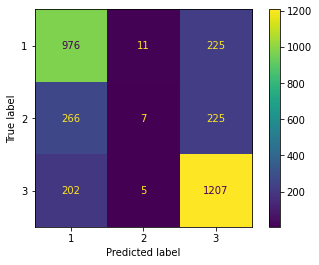

In [20]:
plot_confusion_matrix(text_classifier, X_test, y_test)  
plt.show()

In [21]:
import joblib

joblib.dump(text_classifier, "./rf.joblib")

['./rf.joblib']

## SVM

//TODO: add more description about SVM

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

kernel = 'rbf 

// TODO : add more description about rbf and other hyperparameter

random_state - default = none disini menggunakan 42. Random state sendiri disediakan untuk mengontrol random number generator yang digunakan. Random_state tidak berarti bahwa randomization selalu digunakan, bergantung dengan parameter lainnya.

In [27]:
print(classification_report(y_test, svc.predict(X_test)))  
print("accuracy test = ", accuracy_score(y_test, svc.predict(X_test)))
print("accuracy train = ", accuracy_score(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           1       0.68      0.85      0.76      1212
           2       0.47      0.02      0.03       498
           3       0.76      0.86      0.81      1414

    accuracy                           0.72      3124
   macro avg       0.64      0.57      0.53      3124
weighted avg       0.68      0.72      0.66      3124

accuracy test =  0.7195902688860435
accuracy train =  0.9415217159321311


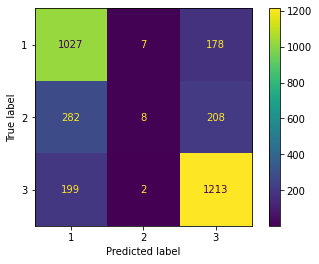

In [28]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

In [29]:
import joblib

joblib.dump(svc, "./svm.joblib")

['./svm.joblib']